In [1]:
from os.path import split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [7]:
dataset = pd.read_csv('C:/Users/kalpe/Desktop/sys_de/Systemdesign/medical_isurance/Medical_Cost.csv')


In [8]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\kalpe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kalpe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kalpe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kalpe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

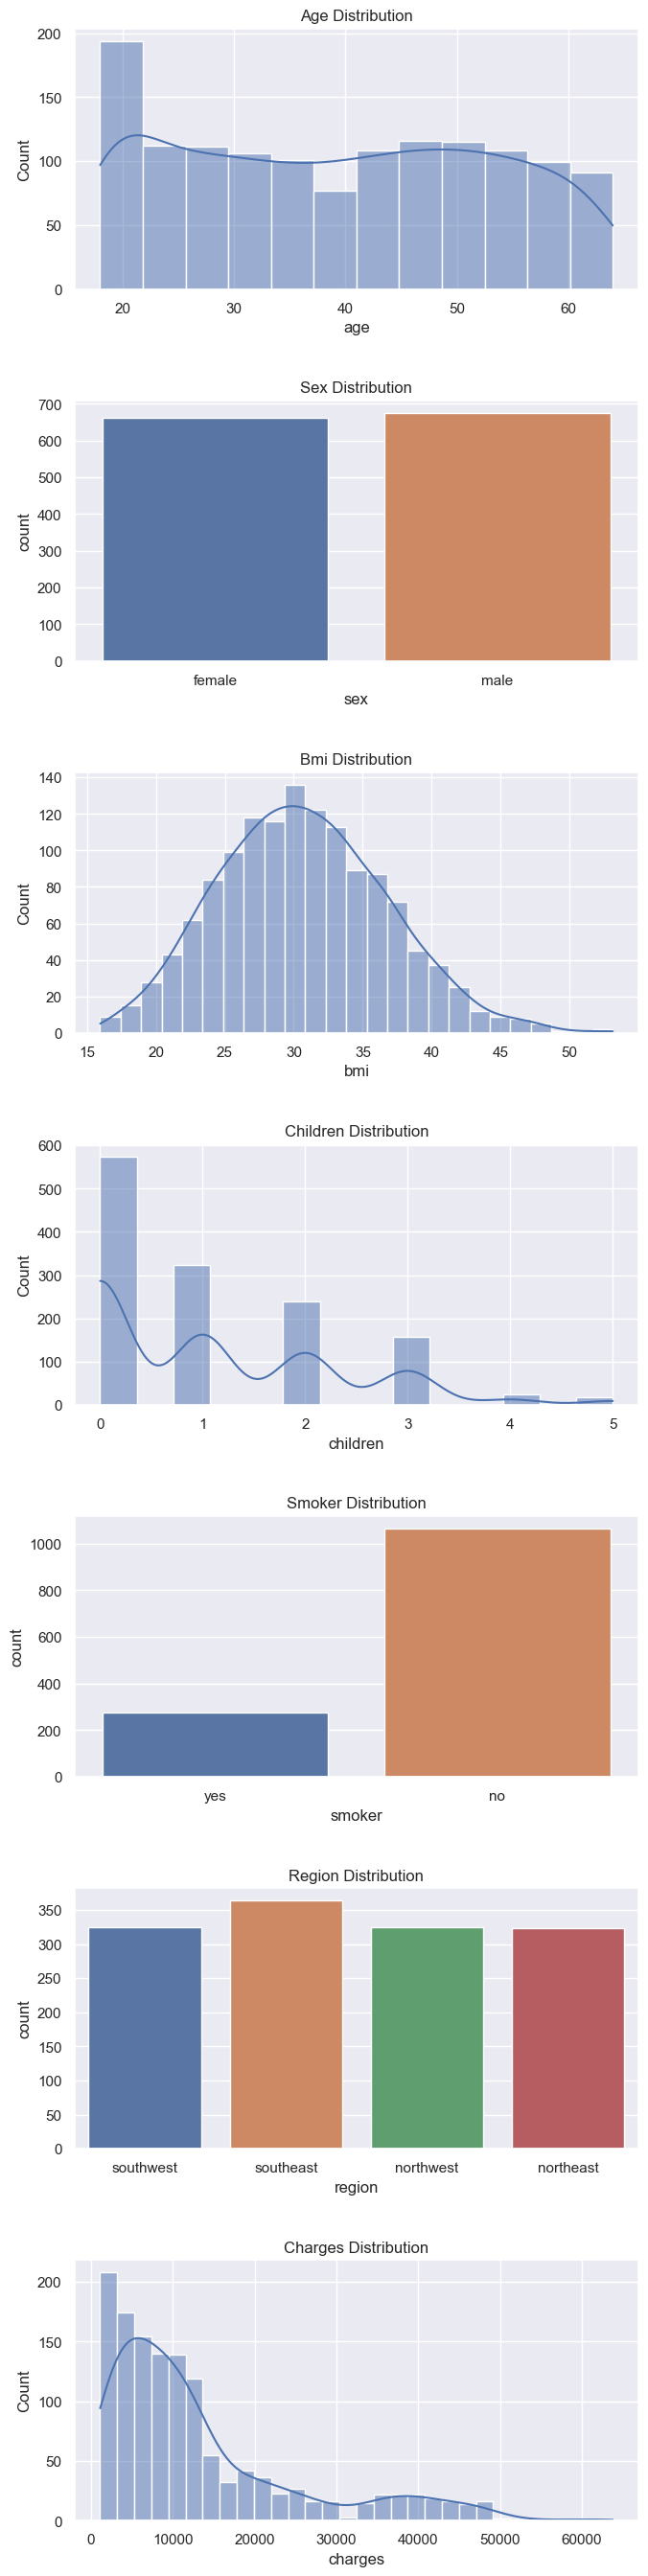

In [12]:
sns.set()
columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

fig, axes = plt.subplots(len(columns), 1, figsize=(8, 4 * len(columns)))
fig.tight_layout(pad=5.0)

for i, col in enumerate(columns):
    if col in ['sex', 'smoker', 'region']:
        sns.countplot(data=dataset, x=col, ax=axes[i])
    else:
        sns.histplot(data=dataset, x=col, kde=True, ax=axes[i])

    axes[i].set_title(f'{col.capitalize()} Distribution')

plt.show()

In [14]:
#encodeing of categorical data
dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [15]:
X=dataset.drop(columns='charges',axis=1)
Y=dataset['charges']

In [16]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [17]:
print(X)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [19]:
print(X.shape,X_train,X_test,Y_train,Y_test)

(1338, 6)       age  sex     bmi  children  smoker  region
882    21    1  22.135         0       1       2
505    37    0  30.875         3       1       3
798    58    1  33.100         0       1       1
792    22    1  23.180         0       1       2
201    48    1  32.230         1       1       0
...   ...  ...     ...       ...     ...     ...
466    60    1  28.700         1       1       1
299    48    1  28.880         1       1       3
493    61    0  43.400         0       1       1
527    51    1  25.800         1       1       1
1192   58    1  32.395         1       1       2

[1070 rows x 6 columns]       age  sex     bmi  children  smoker  region
17     23    0  23.845         0       1       2
1091   55    1  29.830         0       1       2
273    50    0  27.455         1       1       2
270    18    0  29.370         1       1       0
874    44    0  21.850         3       1       2
...   ...  ...     ...       ...     ...     ...
232    19    1  17.800         0  

In [30]:
model=LinearRegression()
model.fit(X_train,Y_train)
trained_data_prediction=model.predict(X_train)
r2_train = metrics.r2_score(Y_train, trained_data_prediction)
print('R squared vale : ', r2_train)
test_data_prediction =model.predict(X_test)
print('R squared vale : ', r2_test)


R squared vale :  0.751505643411174
R squared vale :  0.7447273869684077


In [31]:
import pickle

# Assuming `model` is your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

